#  Getting Started with Intel Extension for PyTorch
This code sample will guide users how to run a PyTorch inference workload on both GPU and CPU by using oneAPI AI Analytics Toolkit and also analyze the GPU and CPU usage via oneDNN verbose logs.

## Resnet50 Inference on both GPU and CPU
***
This section shows users how to run resnet50 inference on both GPU and CPU without code changes.

### prerequisites

In [1]:
# ignore all warning messages
import warnings
warnings.filterwarnings('ignore')
import os

Set the installation path of your oneAPI AI Analytics toolkit

In [2]:
%env ONEAPI_INSTALL=/opt/intel/oneapi

env: ONEAPI_INSTALL=/opt/intel/oneapi


Download the resnet50 inference sample from IPEX github repository

In [3]:
!wget https://raw.githubusercontent.com/intel/intel-extension-for-pytorch/master/examples/cpu/inference/resnet50_general_inference_script.py

--2023-02-26 23:14:06--  https://raw.githubusercontent.com/intel/intel-extension-for-pytorch/master/examples/cpu/inference/resnet50_general_inference_script.py
Resolving proxy-dmz.intel.com (proxy-dmz.intel.com)... 10.7.211.16
Connecting to proxy-dmz.intel.com (proxy-dmz.intel.com)|10.7.211.16|:912... connected.
Proxy request sent, awaiting response... 200 OK
Length: 1644 (1.6K) [text/plain]
Saving to: ‘resnet50_general_inference_script.py’

resnet50_general_in 100%[===================>]   1.61K  --.-KB/s    in 0s      

2023-02-26 23:14:06 (4.20 MB/s) - ‘resnet50_general_inference_script.py’ saved [1644/1644]



Check PyTorch and IPEX verson in current ipython kernel

In [15]:
run version_check.py

PyTorch Version:  1.13.1
mkldnn : True,  mkl : True, openmp : True
PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) oneAPI Math Kernel Library Version 2021.4-Product Build 20210904 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - Build settings: BLAS_INFO=mkl, BUILD_TYPE=Release, CXX_COMPILER=/opt/rh/devtoolset-9/root/usr/bin/c++, CXX_FLAGS= -fabi-version=11 -Wno-deprecated -fvisibility-inlines-hidden -DUSE_PTHREADPOOL -fopenmp -DNDEBUG -DUSE_KINETO -DLIBKINETO_NOCUPTI -DUSE_FBGEMM -DUSE_QNNPACK -DUSE_PYTORCH_QNNPACK -DUSE_XNNPACK -DSYMBOLICATE_MOBILE_DEBUG_HANDLE -DEDGE_PROFILER_USE_KINETO -O2 -fPIC -Wno-narrowing -Wall -Wextra -Werror=return-type -Werror=non-virtual-dtor -Wno-missing-field-initializers -Wno-type-limits -Wno-array-bounds -Wno-unknown-pr

### Run resnet50 on CPU and GPU

#### Run on CPU via IPEX
There is a PyTorch conda environment with IPEX installation in current AI Kit installation.
Users could run resnet50.py on Intel CPU on this PyTorch conda environment.

In [18]:
# %%writefile run.sh
#!/bin/bash
# source $ONEAPI_INSTALL/setvars.sh --force > /dev/null 2>&1
# source activate pytorch
# echo "########## Executing the run"
!DNNL_VERBOSE=1 python resnet50_general_inference_script.py > infer_rn50_cpu.csv
# echo "########## Done with the run"

/home/sdp/anaconda3/envs/TP/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sdp/anaconda3/envs/TP/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


##### Submitting build.sh and run.sh to the job queue

Now we can submit build.sh and run.sh to the job queue.

NOTE - it is possible to execute any of the build and run commands in local environments.
To enable users to run their scripts either on the Intel DevCloud or in local environments, this and subsequent training checks for the existence of the job submission command qsub. If the check fails, it is assumed that build/run will be local.

In [ ]:
! chmod 755 ../../q; chmod 755 run.sh;if [ -x "$(command -v qsub)" ];  then  ../../q run.sh; else ./run.sh; fi

#### Run on GPU via PyTorch
Users also can run the same resnet50.py on GPU with some codes changes.  
The gpu.patch file under codes_for_ipynb contains the needed modifications to resnet50 inference sample on GPU.  
We show the patch below, and users only need to make both model and data to xpu device in their codes.

In [ ]:
!cat codes_for_ipynb/gpu.patch

In [ ]:
!patch < ./codes_for_ipynb/gpu.patch

In [ ]:
%%writefile run.sh
#!/bin/bash
source $ONEAPI_INSTALL/setvars.sh --force > /dev/null 2>&1
source activate pytorch
echo "########## Executing the run"
DNNL_VERBOSE=1 python resnet50_general_inference_script_gpu.py > infer_rn50_gpu.csv
echo "########## Done with the run"

##### Submitting build.sh and run.sh to the job queue

Now we can submit build.sh and run.sh to the job queue.

NOTE - it is possible to execute any of the build and run commands in local environments.
To enable users to run their scripts either on the Intel DevCloud or in local environments, this and subsequent training checks for the existence of the job submission command qsub. If the check fails, it is assumed that build/run will be local.

In [ ]:
! chmod 755 ../../q; chmod 755 run.sh;if [ -x "$(command -v qsub)" ];  then  ../../q run.sh; else ./run.sh; fi

## Analyze Verbose Logs
***


Download profile_utils.py to parse oneDNN verbose logs from previous section.

In [8]:
!wget https://raw.githubusercontent.com/oneapi-src/oneAPI-samples/master/Libraries/oneDNN/tutorials/profiling/profile_utils.py

--2023-02-26 23:16:37--  https://raw.githubusercontent.com/oneapi-src/oneAPI-samples/master/Libraries/oneDNN/tutorials/profiling/profile_utils.py
Resolving proxy-dmz.intel.com (proxy-dmz.intel.com)... 10.7.211.16
Connecting to proxy-dmz.intel.com (proxy-dmz.intel.com)|10.7.211.16|:912... connected.
Proxy request sent, awaiting response... 200 OK
Length: 13369 (13K) [text/plain]
Saving to: ‘profile_utils.py’

profile_utils.py    100%[===================>]  13.06K  --.-KB/s    in 0.001s  

2023-02-26 23:16:37 (12.8 MB/s) - ‘profile_utils.py’ saved [13369/13369]



### Step 1: List out all oneDNN verbose logs
users should see two verbose logs listed in the table below.

|Log File Name | Description |
|:-----|:----|
|infer_rn50_cpu.csv| log for cpu run |
|infer_rn50_gpu.csv| log for gpu run|

In [19]:
import os
filenames= os.listdir (".") 
result = []
keyword = ".csv"
for filename in filenames: 
    #if os.path.isdir(os.path.join(os.path.abspath("."), filename)): 
    if filename.find(keyword) != -1:
        result.append(filename)
result.sort()

index =0 
for folder in result:
    print(" %d : %s " %(index, folder))
    index+=1

 0 : infer_rn50_cpu.csv 


### Step 2:  Pick a verbose log by putting its index value below
Users can pick either cpu or gpu log for analysis.   
Once users finish Step 2 to Step 7 for one log file, they can go back to step 2 and select another log file for analysis.

In [20]:
FdIndex=0

### Step 3: Parse verbose log and get the data back
> Users will also get a oneDNN.json file with timeline information for oneDNN primitives. 

In [21]:
logfile = result[FdIndex]
print(logfile)
from profile_utils import oneDNNUtils, oneDNNLog
onednn = oneDNNUtils()
log1 = oneDNNLog()
log1.load_log(logfile)
data = log1.data
exec_data = log1.exec_data

infer_rn50_cpu.csv


### Step 4: Time breakdown for exec type
The exec type includes exec and create. 

|exec type | Description |  
|:-----|:----|  
|exec | Time for primitives exection. Better to spend most of time on primitives execution. |  
|create| Time for primitives creation. Primitives creation happens once. Better to spend less time on primitive creation. |  

### Step 5: Time breakdown for architecture type
The supported architectures include CPU and GPU.  
For this simple net sample, we don't split computation among CPU and GPU,    
so users should see either 100% CPU time or 100% GPU time. 


 breakdown: arch
Exception!


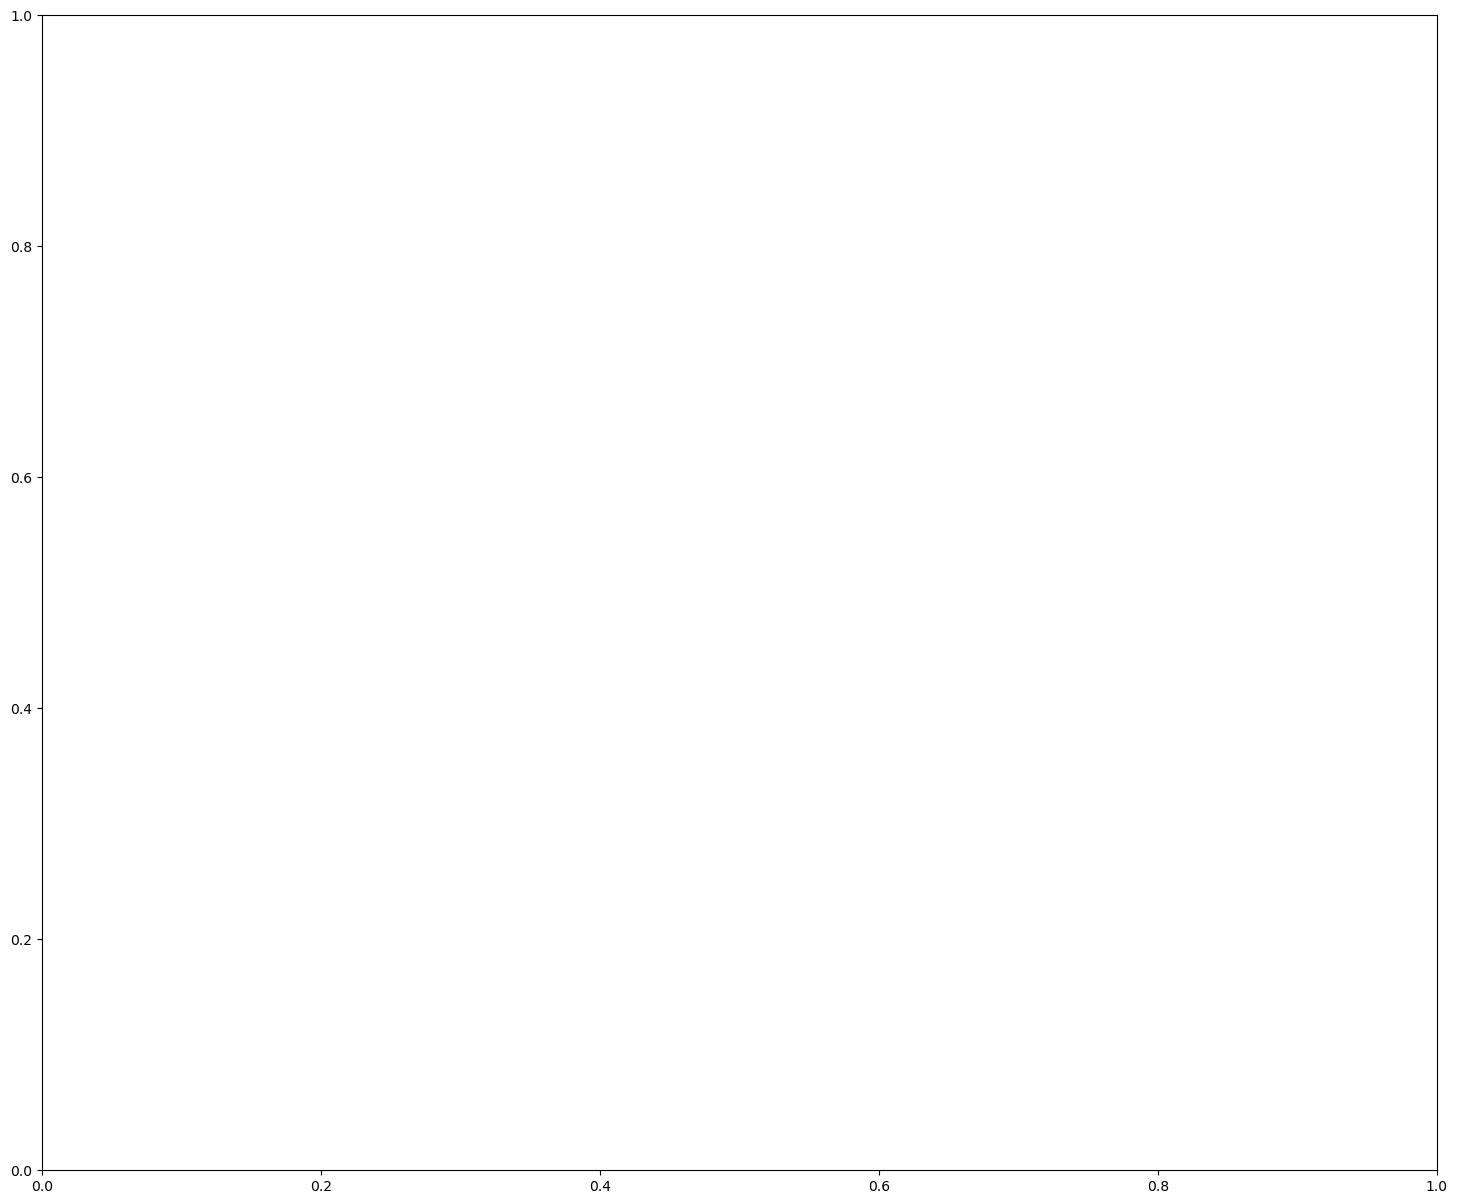

In [22]:
onednn.breakdown(data,"arch","time")

### Step 6: Time breakdown for primitives type
The primitives type includes convolution, reorder, sum, etc.  
For this simple convolution net example, convolution and inner product primitives are expected to spend most of time.  
However, the exact time percentage of different primitivies may vary among different architectures.    
Users can easily identify top hotpots of primitives executions with this time breakdown.  


 breakdown: type
type
convolution     796.456785
reorder        1658.626674
Name: time, dtype: float64


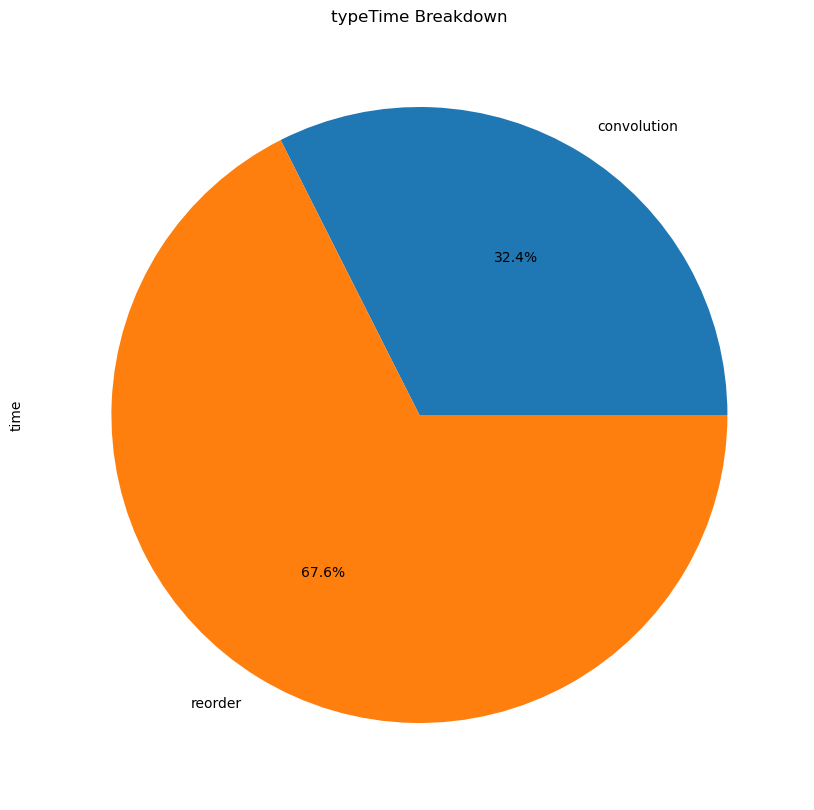

In [26]:
onednn.breakdown(exec_data,"type","time")

### Step 7:  Time breakdown for JIT kernel type
oneDNN uses just-in-time compilation (JIT) to generate optimal code for some functions based on input parameters and instruction set supported by the system.   
Therefore, users can see different JIT kernel type among different CPU and GPU architectures.  
For example, users can see avx_core_vnni JIT kernel if the workload uses VNNI instruction on Cascake Lake platform.  
Users can also see different OCL kernels among different Intel GPU generations.  
Moreover, users can identify the top hotspots of JIT kernel executions with this time breakdown.  



 breakdown: jit
jit
jit:uni                     210.807392
brgconv:avx512_core         323.685287
brgconv_1x1:avx512_core     524.281512
simple:any                 1620.137770
Name: time, dtype: float64


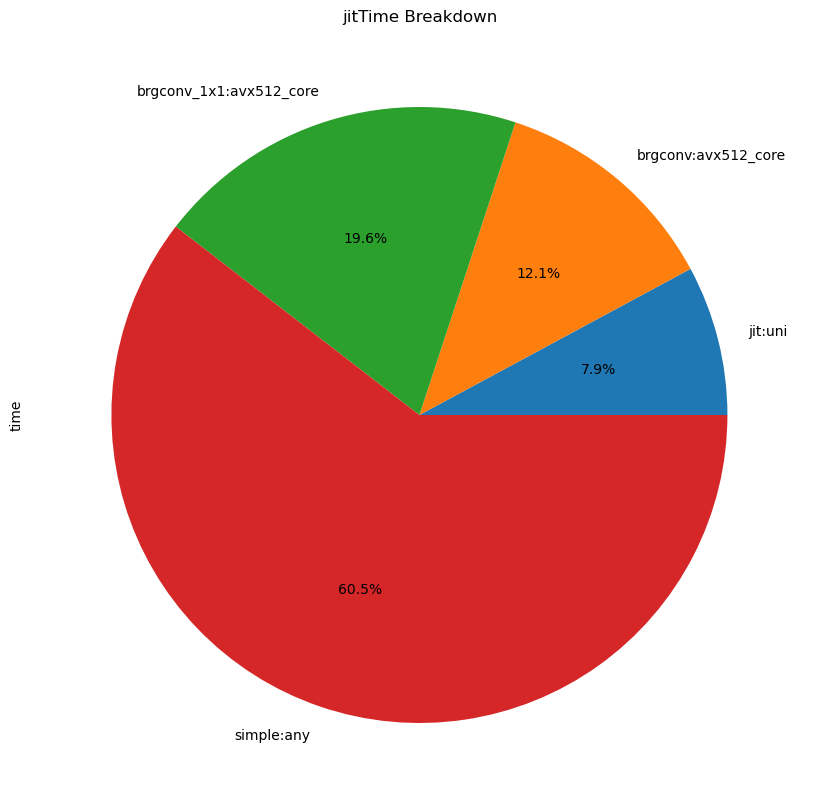

In [14]:
onednn.breakdown(exec_data,"jit","time")

The output(both stdout and stderr) is displayed on the command line console

In [ ]:
print('[CODE_SAMPLE_COMPLETED_SUCCESFULLY]')